## Random Sampling Imputation
<h4>Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values
When should it be used??
IT assumes that the data are missing completely at random(MCAR)</h4>

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [14]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [24]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [32]:
def imputer_nan(df,variable,median):
    df[variable +'_median']=df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [33]:
median=df.Age.median()

In [34]:
imputer_nan(df,'Age',median)

In [38]:
df[df['Age'].isnull()]

,Survived,Age,Fare,Age_median,Age_random
5,0,NaN,8.4583,28.0,28.00
17,1,NaN,13.0000,28.0,50.00
19,1,NaN,7.2250,28.0,0.92
26,0,NaN,7.2250,28.0,36.00
28,1,NaN,7.8792,28.0,26.00
...,...,...,...,...,...
859,0,NaN,7.2292,28.0,22.00
863,0,NaN,69.5500,28.0,25.00
868,0,NaN,9.5000,28.0,15.00
878,0,NaN,7.8958,28.0,34.00


In [37]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

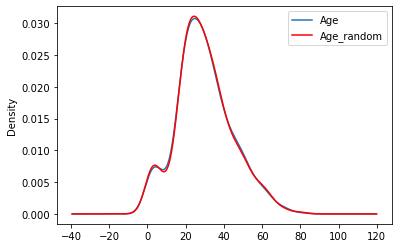

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

### Advantages
Easy to implement

There is less distortion in variance
### Disadvantage
In Every situation randomness wont work

In [55]:
#######################

### Capturing nan values with a new feature
It works well if the data are not missing completely at random

In [56]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [58]:
df['Age_Nan']=np.where(df['Age'].isnull(),1,0)

In [59]:
df.head()

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


### Advantages
Easy to implement

Captures the importance of missing values
### Disadvantage
Creating Additional features (Curse of Dimensionality)

## End of Distribution Imputation

In [79]:
import pandas as pd
import numpy as np

In [80]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [81]:
df.Age.mean()

29.69911764705882

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001596FAB7CA0>]],
      dtype=object)

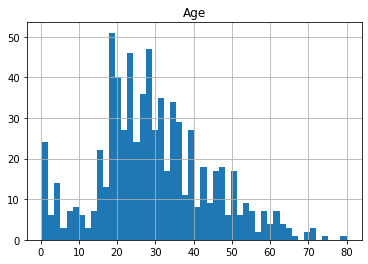

In [82]:
df.hist('Age',bins=50)

In [83]:
extreme = df.Age.mean()+3*df.Age.std() 

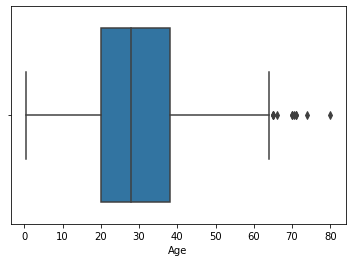

In [84]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [85]:
def imputer_nan(df,variable,median,extreme):
    df[variable +'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [86]:
imputer_nan(df,'Age',df.Age.median(),extreme)

In [87]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


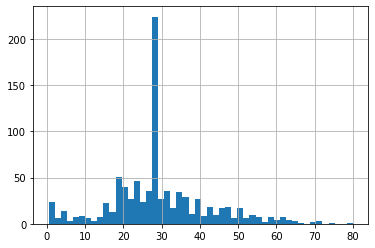

In [89]:
df['Age'].hist(bins=50)

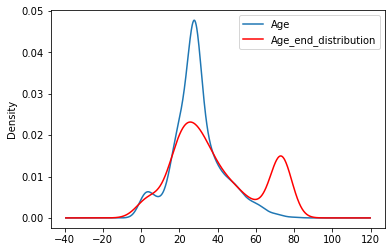

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_end_distribution.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

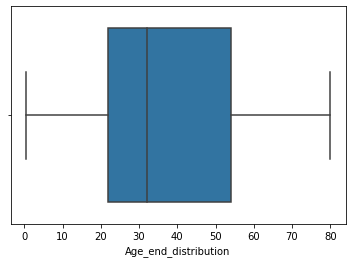

In [92]:
sns.boxplot('Age_end_distribution',data=df)

### Advantages
Easy to implement

Captures the importance of missing if there is one
### Disadvantage
Distorts the original distribution of the varible

If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution

If the number of NA is big, it wull mask the true outliers in the distribution

if the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent feature engineering